In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('https://raw.github.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv')

In [16]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Density'>

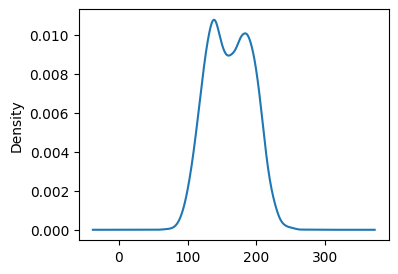

In [21]:
plt.figure(figsize=(4,3))
df['Weight'].plot(kind = 'kde')

In [26]:
st  = float(df['Weight'].quantile(0.01))
end = float(df['Weight'].quantile(0.995))
st, end

(97.03287365980914, 232.2509574169797)

<Axes: xlabel='Weight', ylabel='Count'>

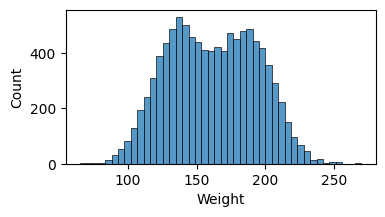

In [30]:
plt.figure(figsize=(4,2))
sns.histplot(x = df['Weight'])

<h1>Trimming</h1>

In [33]:
# this is a trimmed data
df[(df['Weight']<end) & (df['Weight']>st)]

,Gender,Height,Weight
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<h1>Capping</h1>

In [37]:
df['Weight']=np.where(df['Weight']>end, end, np.where(df['Weight']<st, st, df['Weight']))

In [38]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.457831
std,3.847528,31.845123
min,54.263133,97.032874
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,232.250957


<Axes: xlabel='Weight', ylabel='Count'>

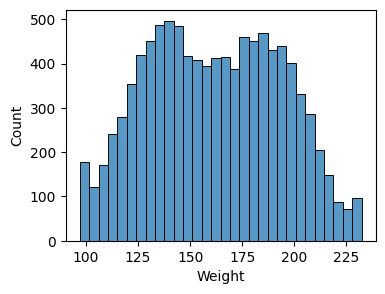

In [48]:
plt.figure(figsize=(4,3))
sns.histplot(df['Weight'], bins = 30)

<Axes: xlabel='Weight'>

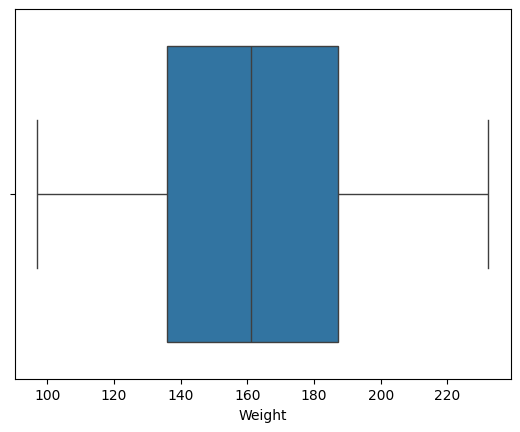

In [50]:
sns.boxplot(x = df['Weight'])